# 1.1 Работа pandas с табличными данными

  Существуют многочисленные форматы хранения данных, такие как XML, JSON, CSV, Parquet, raw bytes и многие другие. Pandas имеет возможность читать множество различных форматов данных. Он всегда конвертирует их в табличные данные. Pandas создан только для анализа этих таблиц. Pandas не является подходящей библиотекой для обработки более чем двумерных данных. Она предназначена для одномерных или двумерных данных.  
  ### The DataFrame and Series  
  - DataFrame – двумерная структура данных, которая выглядит так же, как и любая прямоугольная таблица данных со строками и колонками.  
  - Series – одномерная структура данных. Это аналогичный одиночный столбец данных или одномерный массив

# 1.2 Примеры Pandas

Остальная часть этой главы содержит примеры заданий на общий анализ данных с помощью pandas. На каждую из приведенных ниже основных разделов библиотеки приходится по одному-двум примерам:  
  - Чтение данных
  - Фильтрация данных
  - Методы агрегирования
  - Non-Aggregating methods (Методы, использующие иные, кроме агрегирования, подходы)
  - Агрегирование с помощью групп
  - Чистка данных

# 1.3. Чтение данных

- Объединение данных
- Анализ временных рядов
- Визуализация  

Целью данной статьи является предоставление поверхностного обзора возможностей пандас. Мы ожидаем, что читатель сможет подчерпнуть некоторые идеи того, что может быть достигнуто при помощи пандас, даже не понимания синтаксиса. Объяснения будут короткими, но, мы надеемся, достаточными для понимания конечного результата.  

### Метод head
Большинство последних строк кода заканчивается методом **.head**. По умолчанию, данный метод возвращает первые пять строк DataFrame или Series. Целью данного метода является ограничить вывод для того, чтобы он он легко поместился на экране или книжной странице. Если не использовать метод **.head**, тогда pandas выведет первые 60 строк данных по умолчанию. Для дальнейшего уменьшения вывода методу **.head** будет передано целочисленное значение (обычно 3). С помощью целого числа можно управлять количеством выводимых строк.  

Множество наборов данных используется на протяжении оставшейся части этой главы. Метод **.read_csv** позволяет считывать текстовые данные, раграниченные разделителем. По умолчанию разделитель представляет собой запятую. Далее мы считаем общедоступные данные **bikes** об использовании велосипедов в Чикаго

In [1]:
import pandas as pd
bikes = pd.read_csv('data/bikes.csv')
bikes.head(3)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
0,7147,Subscriber,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,Michigan Ave & Oak St,41.90096,-87.623777,15.0,73.9,10.0,12.7,-9999.0,mostlycloudy
1,7524,Subscriber,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,41.883380,-87.641170,31.0,Wells St & Walton St,41.89993,-87.634430,19.0,69.1,10.0,6.9,-9999.0,partlycloudy
2,10927,Subscriber,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,Dearborn St & Monroe St,41.88132,-87.629521,23.0,73.0,10.0,16.1,-9999.0,mostlycloudy


# 1.4. Отбор данных

Pandas может отбирать строки из датафрейма на основе значений, соответствующих условию в проверяемой строке. Например, мы можем выбрать только те поездки, продолжительность которых более 5000 секунд.  
  
### Одиночное условие
Ниже приведен пример с одиночным условием, тестируемым для каждой строки. Будут выведены только те строки, которые выполнят это условие.

In [2]:
filt = bikes['tripduration'] > 5000
bikes[filt].head(3)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
18,40924,Subscriber,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,41.878114,-87.639971,35.0,Millennium Park,41.881032,-87.624084,35.0,79.0,10.0,13.8,0.0,cloudy
40,61401,Subscriber,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,41.867173,-87.625955,19.0,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,87.1,10.0,8.1,-9999.0,partlycloudy
77,87005,Subscriber,Female,2013-07-21 11:35:00,2013-07-21 13:54:00,8299,State St & 19th St,41.856594,-87.627542,15.0,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,82.9,10.0,5.8,-9999.0,mostlycloudy


### Множественное условие
Можно также проверить множественное условие на каждой строке. Следующий пример выводит поездки, совершенные женщинами  **и** продолжительностью более 5000 секунд

In [3]:
filt1 = bikes['tripduration'] > 5000
filt2 = bikes['gender'] == 'Female'
filt = filt1 & filt2
bikes[filt].head(3)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
40,61401,Subscriber,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,41.867173,-87.625955,19.0,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,87.1,10.0,8.1,-9999.0,partlycloudy
77,87005,Subscriber,Female,2013-07-21 11:35:00,2013-07-21 13:54:00,8299,State St & 19th St,41.856594,-87.627542,15.0,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,82.9,10.0,5.8,-9999.0,mostlycloudy
1954,1103416,Subscriber,Female,2013-12-28 11:37:00,2013-12-28 13:34:00,7050,LaSalle St & Washington St,41.882664,-87.632530,15.0,Theater on the Lake,41.926277,-87.630834,15.0,44.1,10.0,12.7,-9999.0,clear


Следующий пример содержит множественное условие, но для его выполнения достаточно, чтобы только одно истинное значение из условия. Следующий код выводит все строки, где каждый велосипедист является женщиной **или** продолжительность поездки более 5000 секунд

In [4]:
filt = filt1 | filt2
bikes[filt].head(3)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
9,23558,Subscriber,Female,2013-07-04 15:00:00,2013-07-04 15:16:00,922,Lakeview Ave & Fullerton Pkwy,41.925858,-87.638973,19.0,Racine Ave & Congress Pkwy,41.874640,-87.657030,19.0,81.0,10.0,12.7,-9999.0,mostlycloudy
14,31121,Subscriber,Female,2013-07-06 12:39:00,2013-07-06 12:49:00,610,Morgan St & Lake St,41.885483,-87.652305,15.0,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15.0,82.0,10.0,5.8,-9999.0,mostlycloudy
18,40924,Subscriber,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,41.878114,-87.639971,35.0,Millennium Park,41.881032,-87.624084,35.0,79.0,10.0,13.8,0.0,cloudy


### Метод query
Метод **query** представляет собой альтернативный и более доступный для понимания способ фильтрации данных, нежели предыдущий. Все три примера фильтрации , рассмотренных ранее, могут быть реализованы с помощью **query**

In [5]:
# Снова выведем поездки продолжительностью
# более 5000 секунд
bikes.query('tripduration > 5000').head(3)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
18,40924,Subscriber,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,41.878114,-87.639971,35.0,Millennium Park,41.881032,-87.624084,35.0,79.0,10.0,13.8,0.0,cloudy
40,61401,Subscriber,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,41.867173,-87.625955,19.0,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,87.1,10.0,8.1,-9999.0,partlycloudy
77,87005,Subscriber,Female,2013-07-21 11:35:00,2013-07-21 13:54:00,8299,State St & 19th St,41.856594,-87.627542,15.0,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,82.9,10.0,5.8,-9999.0,mostlycloudy


In [6]:
bikes.query('tripduration > 5000 and gender=="Female"').head(3)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
40,61401,Subscriber,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,41.867173,-87.625955,19.0,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,87.1,10.0,8.1,-9999.0,partlycloudy
77,87005,Subscriber,Female,2013-07-21 11:35:00,2013-07-21 13:54:00,8299,State St & 19th St,41.856594,-87.627542,15.0,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,82.9,10.0,5.8,-9999.0,mostlycloudy
1954,1103416,Subscriber,Female,2013-12-28 11:37:00,2013-12-28 13:34:00,7050,LaSalle St & Washington St,41.882664,-87.632530,15.0,Theater on the Lake,41.926277,-87.630834,15.0,44.1,10.0,12.7,-9999.0,clear


In [7]:
bikes.query('tripduration > 5000 or gender=="Female"').head(3)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
9,23558,Subscriber,Female,2013-07-04 15:00:00,2013-07-04 15:16:00,922,Lakeview Ave & Fullerton Pkwy,41.925858,-87.638973,19.0,Racine Ave & Congress Pkwy,41.874640,-87.657030,19.0,81.0,10.0,12.7,-9999.0,mostlycloudy
14,31121,Subscriber,Female,2013-07-06 12:39:00,2013-07-06 12:49:00,610,Morgan St & Lake St,41.885483,-87.652305,15.0,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15.0,82.0,10.0,5.8,-9999.0,mostlycloudy
18,40924,Subscriber,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,41.878114,-87.639971,35.0,Millennium Park,41.881032,-87.624084,35.0,79.0,10.0,13.8,0.0,cloudy


# 1.5. Методы агрегирования
Техническое определение агрегации заключается в том, что последовательность значений объединяется (преобразуется) в единственное число. Например, **sum**, **mean**, **median**, **max**, **min** являются примерами методов агрегирования. По умолчанию, при вызове этих методов в pandas DataFrame применяется агрегирование к каждой колонке. Ниже мы используем датасет, содержащий процентную долю студентов всех колледжей США.

In [8]:
college = pd.read_csv('data/college.csv', index_col='instnm')
cr = college.loc[:, 'ugds_white':'ugds_unkn']
cr.head(3)

,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn
instnm,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715


Вызовем метод **mean**, который выведет нам среднее значение каждой колонки

In [9]:
cr.mean()

ugds_white    0.510207
ugds_black    0.189997
ugds_hisp     0.161635
ugds_asian    0.033544
ugds_aian     0.013813
ugds_nhpi     0.004569
ugds_2mor     0.023950
ugds_nra      0.016086
ugds_unkn     0.045181
dtype: float64

Pandas также позволяет агрегировать строки. Параметр **axis** может быть использован для изменения направления агрегирования.

In [10]:
cr.sum(axis=1).head(3)

instnm
Alabama A & M University               1.0000
University of Alabama at Birmingham    0.9999
Amridge University                     1.0000
dtype: float64

# 1.6. Методы без агрегирования
Это методы, которые предоставляют некоторые вычисления для DataFrame, но не агрегируют данные и обычно сохраняют размерность DataFrame. Например, метод **round** округляет каждое значение до заданного десятичного знака.

In [11]:
cr.round(2).head(3)

,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn
instnm,,,,,,,,,
Alabama A & M University,0.03,0.94,0.01,0.00,0.0,0.0,0.00,0.01,0.01
University of Alabama at Birmingham,0.59,0.26,0.03,0.05,0.0,0.0,0.04,0.02,0.01
Amridge University,0.30,0.42,0.01,0.00,0.0,0.0,0.00,0.00,0.27


# 1.7 Групповое агрегирование
Ранее были представлены методы агрегирования для всего DataFrame. Вместо этого мы можем применять агрегирование только к части данных. Далее мы используем набор данных страховой компании.

In [12]:
ins = pd.read_csv('data/insurance.csv')
ins.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


Одним из самых простых методов агрегирования является частота возникновения всех уникальных значений в одной колонке. Его применение представлено ниже с помощью метода **value_counts**

### Частота повторений уникальных значений в одной колонке

In [13]:
ins['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Одиночная функция агрегирования
Допустим, мы хотим найти средние значения колонки *charges* для каждого уникального значения в колонке *sex*. Метод **groupby** дает нам возможность реализовать это.

In [14]:
ins.groupby('sex').agg(mean_charges=('charges', 'mean')).round(-3)

,mean_charges
sex,
female,13000.0
male,14000.0


### Множественные функции агрегирования

Pandas позволяет нам выполнять множественное агрегирование одновременно. Далее мы вычисляем среднее и максимальное значения по колонке *charges* , а также подсчитываем количество непропущенных значений.

### Множественные функции агрегирования колонок
Pandas позволяет нам группировать данные на основании колонок. В следующем примере каждая уникальная комбинация колонок *sex* и *region* формирует группу. Для каждой группы на колонке *charges* применены те же агрегированные значения, что и в предыдущем примере.

In [15]:
ins.groupby('sex').agg(mean_charges=('charges', 'mean'),
                       max_charges=('charges', 'max'),
                       count_charges=('charges', 'count')).round(0)

,mean_charges,max_charges,count_charges
sex,,,
female,12570.0,63770.0,662
male,13957.0,62593.0,676


In [16]:
ins.groupby(['sex', 'region']).agg(mean_charges=('charges', 'mean'),
                                   max_charges=('charges', 'max'),
                                   count_charges=('charges', 'count')).round(0)

mean_charges  max_charges  count_charges
sex    region                                             
female northeast       12953.0      58571.0            161
       northwest       12480.0      55135.0            164
       southeast       13500.0      63770.0            175
       southwest       11274.0      48824.0            162
male   northeast       13854.0      48549.0            163
       northwest       12354.0      60021.0            161
       southeast       15880.0      62593.0            189
       southwest       13413.0      52591.0            163

### Сводные таблицы

In [17]:
pt = ins.pivot_table(index='sex', columns='region',
                     values='charges', aggfunc='mean').round(0)
pt

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.0,12480.0,13500.0,11274.0
male,13854.0,12354.0,15880.0,13413.0


### Стилизация датафрейма
Pandas позволяет задать различные стили оформления датафрейма для выделения определенных ячеек. В следующем примере желтым цветом выделяются максимальные значения каждой колонки.

In [18]:
pt.style.highlight_max()

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953,12480,13500,11274
male,13854,12354,15880,13413


# 1.8. Приведение данных в порядок
Многие наборы данных перед анализом должны быть приведены в порядок. Pandas оснащен большим количеством инструментов по подготовке данных для будущего анализа.

### Опции метода read_csv
Сейчас мы прочтем новый набор данных об авикатастрофах. Обратите внимание на все вопросительные знаки. Они представляют пропущенные значения, но pandas их прочтет как строки

In [19]:
pc = pd.read_csv('data/tidy/planecrashinfo.csv')
pc.head(3)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...


**read_csv** имеет десятки способов прочесть пропущенные данные. Одним из способов является конвертирование конкретной строки в отсутствующие значения. Обратите внимание, что теперь все вопросительные знаки заменены на **NaN**

In [20]:
pc = pd.read_csv('data/tidy/planecrashinfo.csv', na_values='?')
pc.head(3)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0.0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0.0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0.0,First U.S. dirigible Akron exploded just offsh...


### Действия со строками
Часто в строковом столбце содержатся данные, которые необходимо извлечь. Колонка **aboard** содержит 3 различных кусочка информации: общее количество людей на борту, количество пассажиров, количество членов экипажа

In [21]:
aboard = pc['aboard']
aboard.head()

0     2  (passengers:1 crew:1)
1     1  (passengers:0 crew:1)
2     5  (passengers:0 crew:5)
3     1  (passengers:0 crew:1)
4    20  (passengers:? crew:?)
Name: aboard, dtype: object

pandas имеет специальную функцию для работы со строками. Ниже мы используем регулярные выражения для извлечения соответствующих чисел из колонки **aboard**.

In [23]:
aboard.str.extract(r'(\d+)?\D*(\d+)?\D*(\d+)?').head()

,0,1,2
0,2,1,1
1,1,0,1
2,5,0,5
3,1,0,1
4,20,NaN,NaN


### Приведение к чистому виду
Иногда у вас будет несколько колонок данных, которые можно объединить в один столбец. Посмотрите в представленном ниже датафрейме на среднюю задержку прибытия авиакомпаний в разных аэропортах. Все колонки с трёхбуквенными кодами аэропортов могут быть перемещены в одну и ту же колонку, поскольку все они содержат задержку прибытия, которая имеет одинаковые единицы измерения.

In [25]:
aad = pd.read_csv('data/tidy/average_arrival_delay.csv').head()
aad

,airline,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
0,AA,4.0,9.0,5.0,11.0,8.0,3.0,1.0,8.0,5.0,3.0
1,AS,6.0,-3.0,-5.0,1.0,2.0,-3.0,6.0,2.0,-9.0,4.0
2,B6,NaN,12.0,4.0,NaN,11.0,2.0,NaN,23.0,20.0,5.0
3,DL,0.0,-3.0,10.0,3.0,-3.0,3.0,-1.0,7.0,-4.0,0.0
4,EV,7.0,14.0,10.0,3.0,NaN,NaN,10.0,8.0,-14.0,NaN


Метод **.melt** соединяет колонки по принципу "одно на другое". Здесь размещены все трёхбуквенные коды аэропортов в одной колонке. Первые два аэропорта (ATL и DEN) показаны ниже в новом приведенном в порядок датафрейме

In [27]:
aad.melt(id_vars='airline', var_name='airport', value_name='delay').head(10)

,airline,airport,delay
0,AA,ATL,4.0
1,AS,ATL,6.0
2,B6,ATL,NaN
3,DL,ATL,0.0
4,EV,ATL,7.0
5,AA,DEN,9.0
6,AS,DEN,-3.0
7,B6,DEN,12.0
8,DL,DEN,-3.0
9,EV,DEN,14.0


# Объединение данных
Pandas может объединять несколько датафреймов воедино, сопоставляя значения в одной или более колонках. Если вы знакомы с SQL, тогда pandas выполняет объединения аналогичным образом. Ниже показано подключение к базе данных и чтение двух ее таблиц.

In [32]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/databases/neurIPS.db') 
authors = pd.read_sql('Authors', engine)
pa = pd.read_sql('PaperAuthors', engine)

Выведем первые три строки каждого датафрейма

In [33]:
authors.head(3)

,Id,Name
0,178,Yoshua Bengio
1,200,Yann LeCun
2,205,Avrim Blum


In [34]:
pa.head(3)

,Id,PaperId,AuthorId
0,1,5677,7956
1,2,5677,2649
2,3,5941,8299


Сейчас мы можем объединить эти таблицы вместе, используя метод **merge**. Колонка **AuthorID** из таблицы **pa** выравнена со столбцом **Id** таблицы **authors**

In [35]:
pa.merge(authors, how='left', left_on='AuthorId', right_on='Id').head()

,Id_x,PaperId,AuthorId,Id_y,Name
0,1,5677,7956,7956,Nihar Bhadresh Shah
1,2,5677,2649,2649,Denny Zhou
2,3,5941,8299,8299,Brendan van Rooyen
3,4,5941,8300,8300,Aditya Menon
4,5,5941,575,575,Robert C. Williamson


# Анализ временных рядов
Одной из первоначальных целей библиотеки pandas был анализ временных рядов. Ниже мы прочтем данные Microsoft по ценам закрытия акций за двадцать лет.

In [36]:
msft = pd.read_csv('data/stocks/msft20.csv', parse_dates=['date'], index_col='date')
msft.head()

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
1999-10-19,88.250,89.250,85.250,86.313,27.8594,69945600,0.0
1999-10-20,91.563,92.375,90.250,92.250,29.7758,88090600,0.0
1999-10-21,90.563,93.125,90.500,93.063,30.0381,60801200,0.0
1999-10-22,93.563,93.875,91.750,92.688,29.9171,43650600,0.0
1999-10-25,92.000,93.563,91.125,92.438,29.8364,30492200,0.0


### Выбор периода времени
Pandas позволяет нам легко выбрать период времени. Ниже мы выбираем все торговые операции с 27 февраля 2017 года по 2 марта 2017 года.

In [37]:
msft['2017-02-27':'2017-03-02']

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
2017-02-27,64.54,64.54,64.045,64.23,61.4355,15871500,0.0
2017-02-28,64.08,64.20,63.760,63.98,61.1964,23239800,0.0
2017-03-01,64.13,64.99,64.022,64.94,62.1146,26937500,0.0
2017-03-02,64.69,64.75,63.880,64.01,61.2251,24539600,0.0


### Группировка по времени
Мы можем группировать по временным промежуткам. Здесь мы группируем вместе каждый месяц торговых операций и выводим среднее значение цен закрытия акций этого месяца.

In [38]:
msft_mc = msft.resample('M').agg({'close':'mean'})
msft_mc.head()

,close
date,
1999-10-31,91.382222
1999-11-30,89.463762
1999-12-31,106.190545
2000-01-31,107.115800
2000-02-29,99.300250


# 1.11 Визуализация
Pandas предоставляет базовые возможности визуализации. Ниже мы построим график среднемесячной цены закрытия акций Microsoft за последние 5 лет.

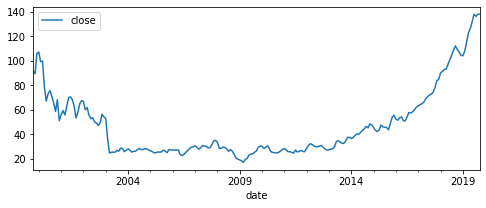

In [39]:
%matplotlib inline
msft_mc.plot(kind='line', figsize=(8, 3));

In [ ]:
Здесь мы используем данные по распределению студентов колледжа по расовой принадлежности для создания ящика с усами

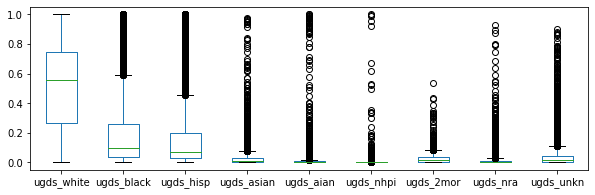

In [40]:
cr.plot(kind='box', figsize=(10,3));

Мы преобразуем нашу сводную таблицу из вышеприведенного вида к гистограмме

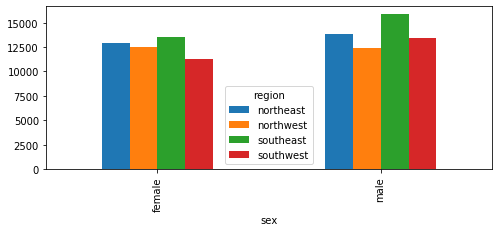

In [41]:
pt.plot(kind='bar', figsize=(8,3));